# 🏥 **Pima_Indians_Data_Diabetes_Prediction** 📊

## **Q1 -  Use the “pima-indians-diabetes.csv” dataset and note down the meta information.**

## **Metadata:**

The Pima Indians Diabetes Database is a collection of independent variables   (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction , and Age) that have been observed along with one dependent variable (Outcome (1 if the individual has diabetes, 0 if they do not)).


The Details of the independent variables are given below:

* **Pregnancies** - Number of Pregnancies the individual has experienced
* **Glucose** - Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* **BloodPressure** - Diastolic blood pressure (mm Hg)
* **SkinThickness** - Triceps skin fold thickness (mm)
* **Insulin** - 2-Hour serum insulin (mu U/ml)
* **BMI** - Body Mass Index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction** - A measure of the genetic influence of diabetes on an individual (the closer the value is to 1, the more likely the individual is to have diabetes).

Importing standard libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Importing data:

In [ ]:
df = pd.read_csv("C:\\Users\\gouri\\OneDrive\\Desktop\\ML LAB\\Week 2\\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Checking for missing values in the dataset - there are none
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

There are instances where BMI has been listed to be zero, which is impossible for a human to have. These values will be removed.

In [ ]:
print("Values Before Dropping Rows")
print("Minimum BMI:", df["BMI"].min())
print("Maximum BMI:", df["BMI"].max())

Values Before Dropping Rows
Minimum BMI: 0.0
Maximum BMI: 67.1


In [ ]:
df.drop(df.index[df['BMI'] == 0], inplace=True)
print("Values After Dropping Rows")
print("Minimum BMI:", df["BMI"].min())
print("Maximum BMI:", df["BMI"].max())

Values After Dropping Rows
Minimum BMI: 18.2
Maximum BMI: 67.1


## **Q2 - Compute mean & standard deviation, tabulate and visualize the age of the patients**

In [ ]:
print("Mean Age:", df["Age"].mean())
print("Standard Deviation of Age: ", df["Age"].std())

Mean Age: 33.28137384412153
Standard Deviation of Age:  11.697751523376121


In [ ]:
print("Minimum Age:", df["Age"].min())
print("Maximum Age:", df["Age"].max())

Minimum Age: 21
Maximum Age: 81


In [ ]:
# Crosstabulation showing diabetes prevalance per age
# 1 = Has diabetes
# 0 = Does not have diabetes

pd.crosstab(index = df["Age"], columns = df["Outcome"])

Outcome,0,1
Age,,
21,55,5
22,59,11
23,31,7
24,37,8
25,33,14
26,24,8
27,24,8
28,25,10
29,16,13


C:\Users\gouri\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


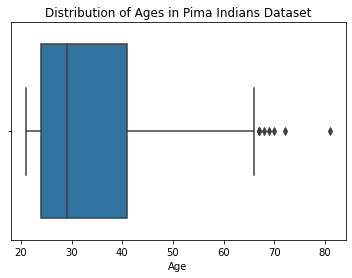

In [ ]:
# Creating a boxplot for age distribution:
sns.boxplot(df["Age"])
plt.title("Distribution of Ages in Pima Indians Dataset")
plt.show()

* The data is positively skewed. Mean > Median > Mode. While it gives a lot of information regarding younger individuals (from around ages 25 to 40),
* There is comparatively little information concerning individuals above the age of 40 (especially those above the age of 65 since they are shown to be outliers here).
* This dataset is not balanced as the number of individuals across the different age groups is not consistent(decreases as the age increases), 
* So there will be some bias in how the model can predict whether or not older individuals are diabetic.

## **Q3 - Analyze and tabulate the relationship of age, BMI of patients with respect to the class**

In [ ]:
graphdf = df[['Age', 'Outcome']] # Creating a smaller dataframe composed of only "age" and "outcome" columns
diabetic = pd.DataFrame(graphdf[graphdf['Outcome'] == 1]) # Isolating those with diabetes
nondiabetic = pd.DataFrame(graphdf[graphdf['Outcome'] == 0]) # Isolating those without diabetes

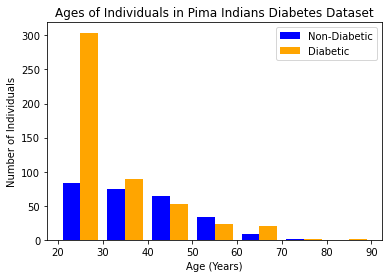

In [ ]:
# Defining plot characteristics:
n, bins, patches = plt.hist([diabetic["Age"], nondiabetic["Age"]], bins = [20, 30, 40, 50, 60, 70, 80, 90], color = ["Blue", "Orange"], label = ['Non-Diabetic', 'Diabetic'])

plt.grid(color='white', lw = 0.5, axis='x')
plt.title("Ages of Individuals in Pima Indians Diabetes Dataset")
plt.xlabel("Age (Years)")
plt.ylabel("Number of Individuals")
plt.legend()

* The histogram above indicates that the majority (nearly 400) of the individuals in the dataset are between the ages of 20-30, which is below the mean age. This age group possesses the greatest number of diabetic individuals (around 80).
* But going off of the given data, most diabetic individuals are between the ages of 20 and 40.

Comparing the BMI of indivudlas with and without diabetes:

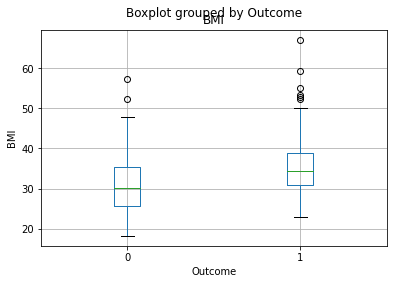

In [ ]:
df.boxplot("BMI", by = "Outcome")
plt.ylabel("BMI")
plt.show()

* As seen above, the BMI median, minimum, and maximum values for diabetic individuals is greater than for non-diabetic individuals.
* The median BMI of diabetic individuals is around 35, which is 5 points greater than the median value for nondiabetics.
* There are also far more outliers exceeding a BMI of 50 in the diabetics class than in nondiabetics.
* Overall, the diabetic individuals have greater BMIs than non-diabetic individuals.

## **Q5 - Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn.**

Importing the required libraries:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Defining hte independent and dependent variables:

In [ ]:
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = df['Outcome'].values

Reshaping y to be compatible with out model:

In [ ]:
y = y.reshape(-1,1)

Splitting x and y into train and test sets:

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 37)

In [ ]:
print("Shapes of the Different Sets:")
print("Boston Dataframe:", df.shape)
print("Input Training set", x_train.shape)
print("Output Training set", y_train.shape)
print("Input Testing set", x_test.shape)
print("Output Testing set", y_test.shape)

Shapes of the Different Sets:
Boston Dataframe: (757, 9)
Input Training set (529, 8)
Output Training set (529, 1)
Input Testing set (228, 8)
Output Testing set (228, 1)


### The Model:

In [ ]:
Pred_Model = LogisticRegression() # Creating an instance of the logistic regression model

In [ ]:
Pred_Model.fit(x_train,y_train) # Training our model instance on our training data

C:\Users\gouri\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\gouri\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## **Q6 - Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map.**

In [ ]:
from sklearn import metrics

In [ ]:
# Obtaining model predictions for whether or not an individual is diabetic
predictions = Pred_Model.predict(x_test)

In [ ]:
predictions

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

Displaying the results:

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions) # Creating a confusion matrix
matrix

array([[131,  25],
       [ 31,  41]], dtype=int64)

Visualizing our confusion matrix:

<AxesSubplot:>

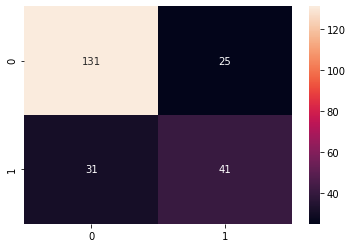

In [ ]:
#top left = True Positive
#top right = false positive
#bottom left = false negative
#bottom right = true negative

sns.heatmap(matrix, annot=True, fmt = 'g')

<AxesSubplot:>

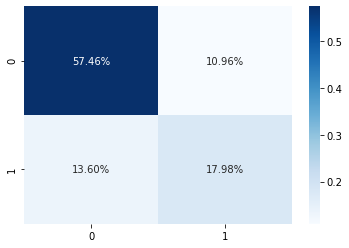

In [ ]:
#Representing the same numbers as percentages of the test set: 
sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')

Calculating more metrics:

In [ ]:
#Accuracy Rate = (True Positive + True Negative)/ all
accuracy_rate = (matrix[0,0] + matrix[1,1]) / matrix.sum()
accuracy_rate

0.7543859649122807

In [ ]:
#True Positive Rate = True Positive/ (True Positive + False Negative)
true_positive_rate = matrix[0,0] / matrix[:, 0].sum()
true_positive_rate

0.808641975308642

In [ ]:
#True Negative Rate = True Negative/ (True Negative + False Positive)
true_negative_rate = matrix[1,1] / matrix[:, 1].sum()
true_negative_rate

0.6212121212121212

In [ ]:
false_positive_rate = matrix[0,1] / matrix[:, 1].sum()
false_positive_rate

0.3787878787878788

In [ ]:
false_negative_rate = matrix[1, 0] / matrix[:, 0].sum()
false_negative_rate

0.19135802469135801

* The true positive rate being above 80% indicates that this model predicts that individuals (who are actually diabetic) to be diabetic moderately well (accurately 80% of the time).
* This is supported by the overall accuracy rate being around 75% (the model predicts whether a person is diabetic or nondiabetic correctly 75% of the time).


* The model is not perfect, however, as it falsely predicts individuals to be diabetic nearly 38% of the time.
* The model incorrectly predicts people to be nondiabetic nearly 20% of the time, meaning nearly 20% of patients who are actually diabetic will be predicted to be nondiabetic.
* If basing diagnosis purely on this model, this particular group of patients will be at risk of worsening their health due to not receiving appropriate medical support on time.

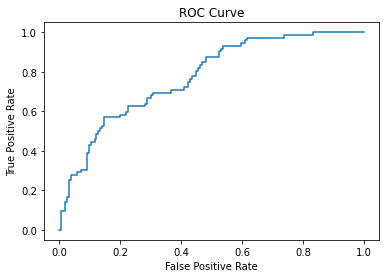

In [ ]:
#The ROC curve plots true positive rate and false positive rate
from sklearn import metrics
roc = Pred_Model.predict_proba(x_test)[::, 1]
false_positive_rate, true_positive_rate , _ = metrics.roc_curve(y_test, roc)
plt.plot(false_positive_rate,true_positive_rate)
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

* Points on an ROC curve represent sensitivity & specificity pairs.
* A perfect model would have an roc curve that passes through the upper left corner
* The ROC curve above approaches and nearly crosses the corner, which indicates that the model is moderately accurate. 